In [382]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable
import math
from wordcloud import WordCloud
import random

plt.rcParams["figure.figsize"] = (10,8)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
sns.set_palette("husl", 9)


## Info general
- Fecha encuesta 2021
- Total respuestas analizadas: 25.973
    -   Profesionales: 17.177
    -   No profesionales: 8.790

In [383]:
df = pd.read_csv("Archivos/profesionales_nonull.csv", index_col= 0)

In [385]:
df_completo = pd.read_csv("Archivos/archivo_limpio.csv", index_col= 0)

In [387]:
df_noprof = pd.read_csv("Archivos/no_profesionales.csv", index_col= 0)

In [444]:
#Código para poner las labels en dos lineas
import textwrap
def wrap_labels(fig, width, break_long_words=False):
    labels = []
    for label in fig.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    fig.set_yticklabels(labels, rotation=0)

In [390]:
def data_pregunta(dataf, colum):  # funcion para hacer df con la columna que queremos separar
    df = dataf[["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario",colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [391]:
def data_pregunta2(dataf, colum):
    df = dataf[["genero", "puesto_trabajo", colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [392]:
df_q29b_noprof = data_pregunta2(df_noprof, 'q29b_productos_familiar_cloud_computing')
df_q32b_noprof = data_pregunta2(df_noprof, 'q32b_productos_familiar_bd')
df_q34b_noprof = data_pregunta2(df_noprof, 'q34b_herramientas_familiar_bi')
df_q37b_noprof = data_pregunta2(df_noprof, 'q37b_cat_herramientas_familiar_ml_aut')


/tmp/ipykernel_576/2452017766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_576/2452017766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_576/2452017766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [393]:
df_q29b_prof = data_pregunta(df, 'q29b_productos_familiar_cloud_computing')
df_q32b_prof = data_pregunta(df, 'q32b_productos_familiar_bd')
df_q34b_prof = data_pregunta(df, 'q34b_herramientas_familiar_bi')
df_q37b_prof = data_pregunta(df, 'q37b_cat_herramientas_familiar_ml_aut')

/tmp/ipykernel_576/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_576/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_576/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

---

### PRINCIPALES HERRAMIENTAS DE VISUALIZACIÓN

---

In [394]:
# Creamos un DF ejecutando la función data_pregunta
df_visualizacion = data_pregunta(df, "herramientas_visualizacion")

/tmp/ipykernel_576/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [395]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_ordenada = df_visualizacion["herramientas_visualizacion"].value_counts().index.tolist()

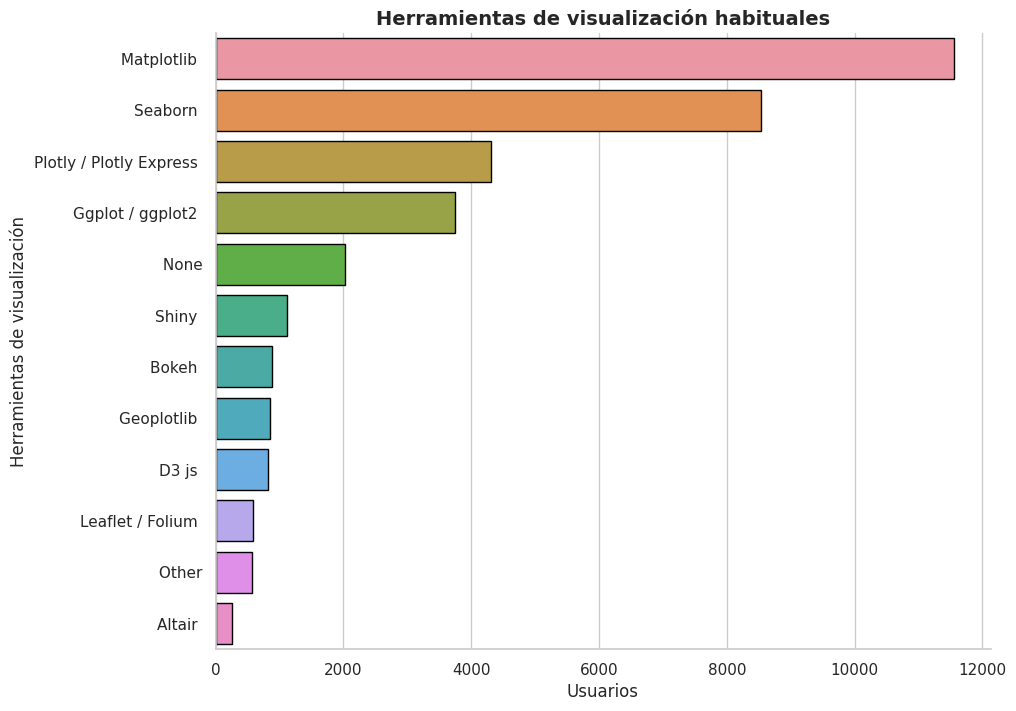

In [429]:
# Realizamos un countplot para visualizar las librerias de visualización más usadas
fig = sns.countplot(y = "herramientas_visualizacion", data= df_visualizacion, order= lista_ordenada, edgecolor ='black')
plt.title(label = "Herramientas de visualización habituales", fontsize = 14, fontweight='bold')
fig.set(ylabel='Herramientas de visualización', xlabel = 'Usuarios')
plt.show()

In [397]:
list_herr = df_visualizacion["herramientas_visualizacion"].value_counts()[:4].index.tolist()

In [398]:
# Creamos un df filtrando por la lista con las librerías más habituales
df_herramientas = df_visualizacion.loc[df_visualizacion["herramientas_visualizacion"].isin(list_herr)]

In [399]:
lista_ordenada2 = df_herramientas["herramientas_visualizacion"].value_counts().index.tolist()


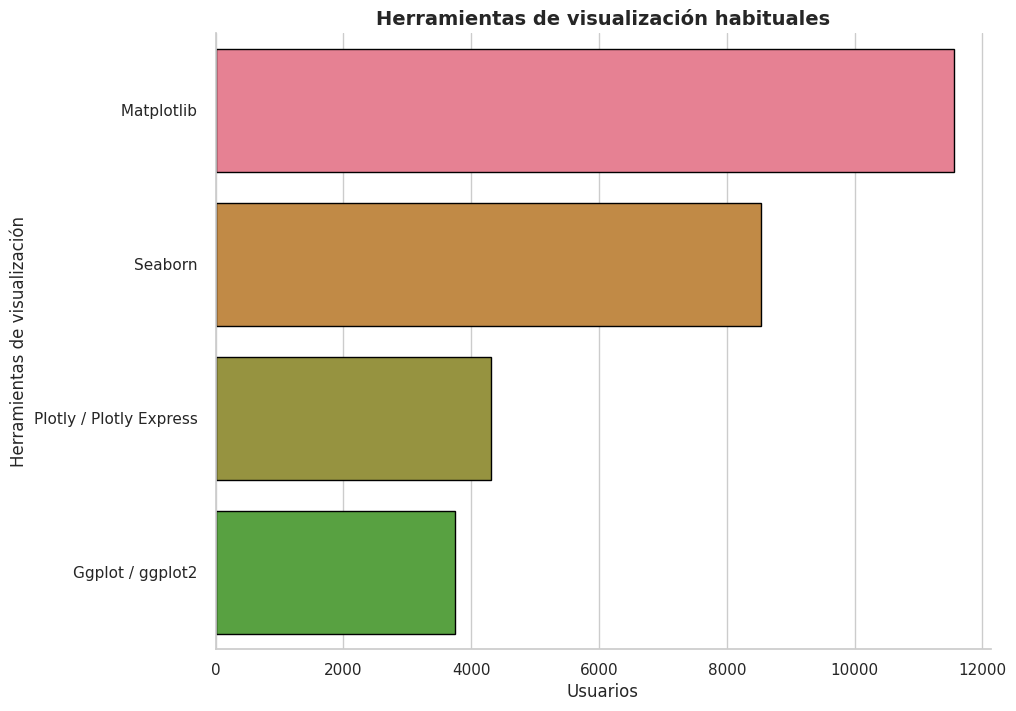

In [428]:
# Realizamos un countplot para visualizar las librerias de visualización más habituales
fig = sns.countplot(y = "herramientas_visualizacion", data= df_herramientas, order= lista_ordenada2, edgecolor ='black')
plt.title(label = "Herramientas de visualización habituales", fontsize = 14, fontweight='bold')
fig.set(ylabel='Herramientas de visualización', xlabel = 'Usuarios')
plt.show()

>Los datos indican que,
>- **Matplotlib** es el recurso de código abierto más usado, creado desde el 2003, cruzando visualización y representación de gráficas, 
>seguido de **Seaborn** que suele encontrase como más sencilla y con más opciones a la hora de la personalización de las gráficas.
>- Según información externa, **Plotly** es muy utilizada en el mundo empresarial y **Ggplot** es de las más antiguas, que están en tercer y cuatro 
>lugar en las respuestas de los encuestados.


---
### LENGUAJES QUE RECOMIENDAN LOS USUARIOS
---

In [401]:
lista_ordenada_leng = df["lenguaje_recomendado"].value_counts().index.tolist()

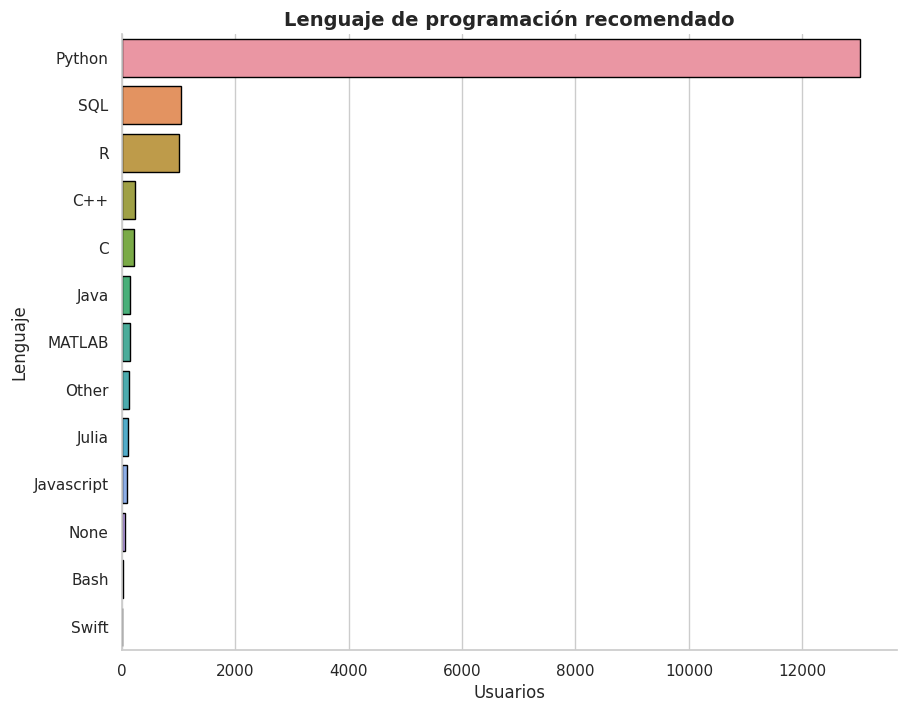

In [431]:
fig = sns.countplot(y= "lenguaje_recomendado", data= df, order= lista_ordenada_leng,  edgecolor ='black')
fig.set(ylabel='Lenguaje', xlabel = 'Usuarios')
plt.title(label = "Lenguaje de programación recomendado", fontsize = 14, fontweight='bold')
plt.show()

In [403]:
list_leng = df["lenguaje_recomendado"].value_counts()[:3].index.tolist()

In [404]:
df_lenguaje = df.loc[df["lenguaje_recomendado"].isin(list_leng)]

In [405]:
lista_ordenada_leng2 = df_lenguaje["lenguaje_recomendado"].value_counts().index.tolist()

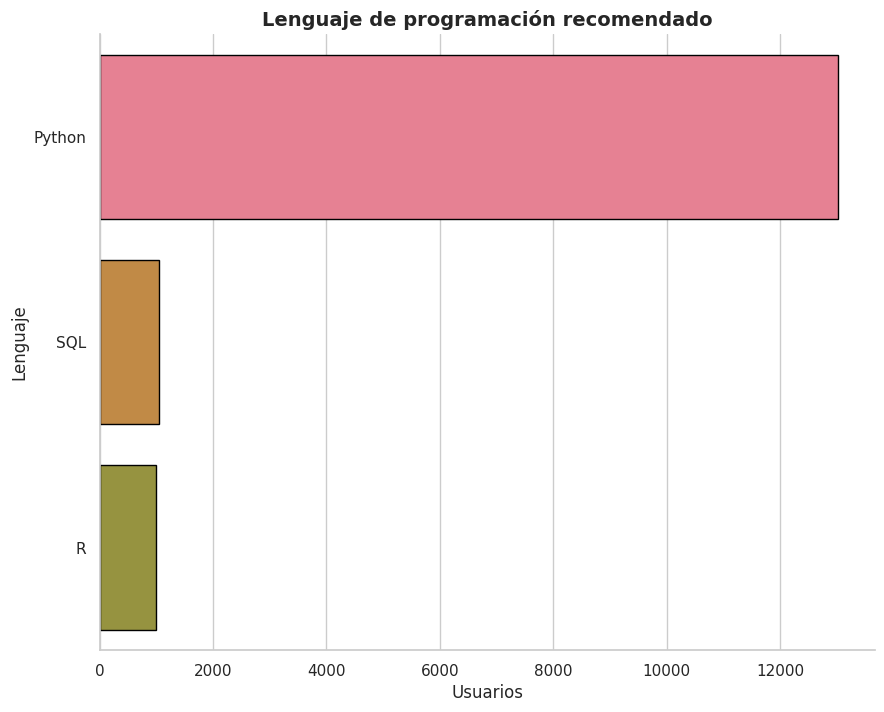

In [432]:
fig = sns.countplot(y= "lenguaje_recomendado", data= df_lenguaje, order= lista_ordenada_leng2,  edgecolor ='black')
fig.set(ylabel='Lenguaje', xlabel = 'Usuarios')
plt.title(label = "Lenguaje de programación recomendado", fontsize = 14, fontweight='bold')
plt.show()

>- Los datos complementan motivos por los que las herramientas de visualización mencionadas antes sean las más usadas, y es que se basan en el 
>lenguaje de programación más utilizado y popular de los últimos años, **Python**. Puede que sea porque este lenguaje tiene un propósito general
>(data, diseño web y desarrollo de videojuegos) y es muy utilizado en la comunidad data science por su gran número de librerias y su gran
>utilidad para cualquier tarea (preprocesar datos, visualización, análisis estadístico, machine learning).
>Además es el más recomendado para principiantes por considerarse lenguaje simple con sintaxis legible.
>- **SQL** aparece el segundo lugar, utilizado para comunicarse con bases de datos y extraer datos, por lo que es muy importante en data science, 
>prácticamente obligatorio. Lenguaje más simple que otros y muy versátil por tener la misma sintaxis para diferentes sistemas (SQLite, MySql 
>y postgreSQL).
>- En tercer lugar, **R**, menos popular que python pero gran competidor, tiene una gran comunidad y buen número de librerias. Orientado a data 
>science para la manipulación, extracción , visualización, estadística y machine learning.

---

### SITIOS DONDE SE COMPARTE

---

In [409]:
df_plataforma =data_pregunta(df,'q39_plat_compartir_trabajo')
lista_plataformas = df_plataforma['q39_plat_compartir_trabajo'].value_counts()[:4].index.tolist()
df_plat_mas = df_plataforma.loc[df_plataforma['q39_plat_compartir_trabajo'].isin(lista_plataformas)]

/tmp/ipykernel_576/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [410]:
lista_plat = df_plataforma['q39_plat_compartir_trabajo'].value_counts().index.tolist()

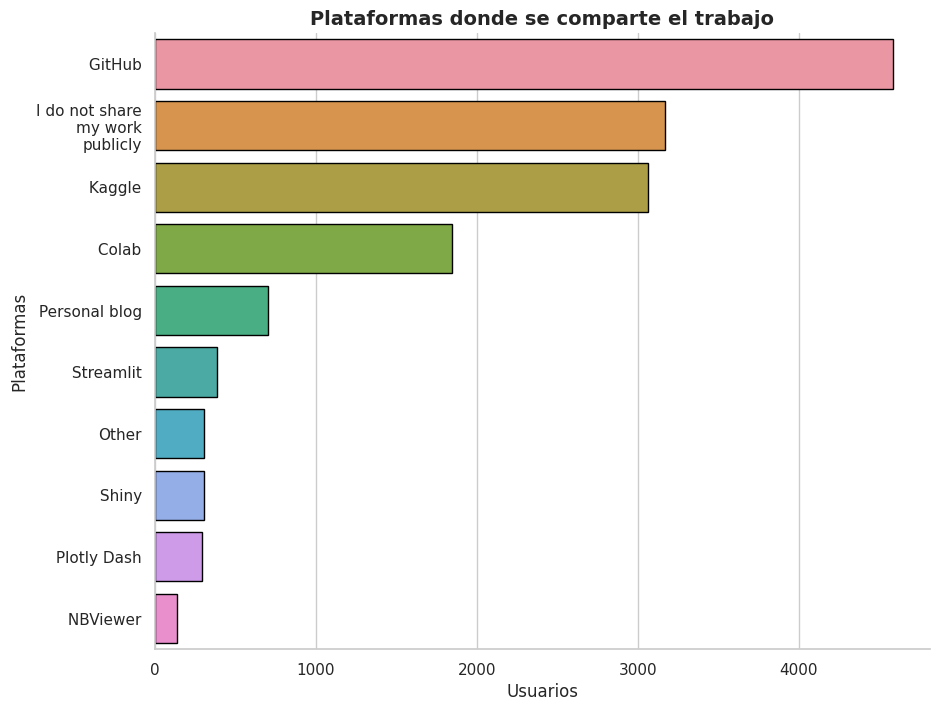

In [446]:
#Gráfica de Plataformas donde se comparte públicamente el trabajo
fig = sns.countplot(y = 'q39_plat_compartir_trabajo', data = df_plataforma ,order =lista_plat , edgecolor ='black')
fig.set(ylabel='Plataformas', xlabel = 'Usuarios')
wrap_labels(fig, 15)
plt.title(label = "Plataformas donde se comparte el trabajo", fontsize = 14, fontweight='bold')
plt.show()

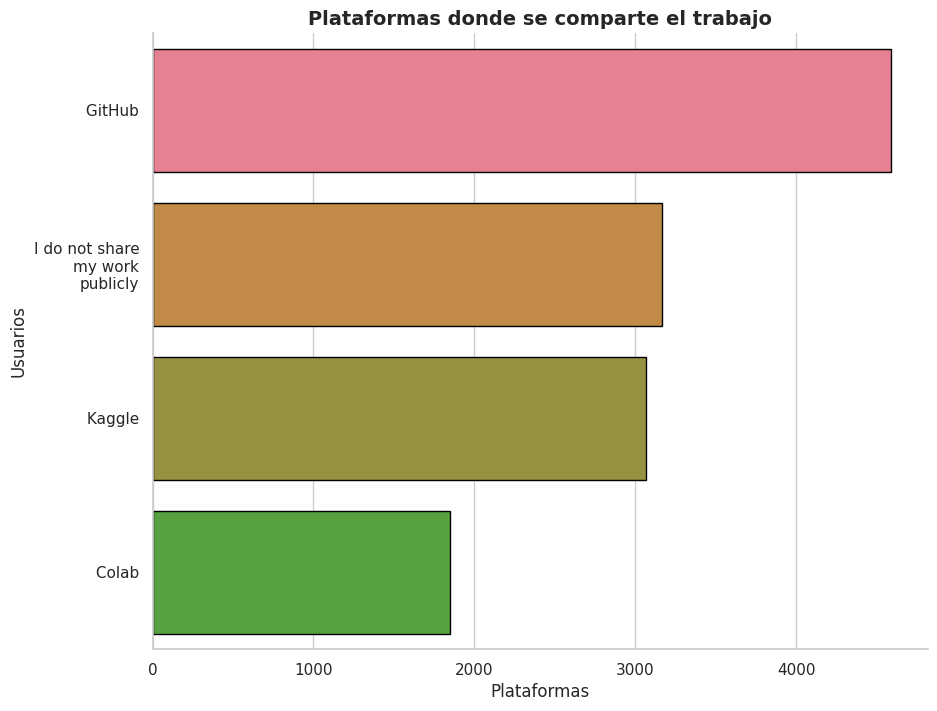

In [447]:
#Gráfica de Plataformas donde se comparte públicamente el trabajo
plt.figure(figsize=(10,8))
fig = sns.countplot(y = 'q39_plat_compartir_trabajo', data = df_plat_mas,order =lista_plataformas, edgecolor ='black')
fig.set(xlabel='Plataformas', ylabel = 'Usuarios')
wrap_labels(fig, 15)
plt.title(label = "Plataformas donde se comparte el trabajo", fontsize = 14, fontweight='bold')
plt.show()

---

### PLATAFORMA DE CURSOS

---

In [413]:
# Creamos dataframe con la función data_pregunta
df_cursos = data_pregunta(df,"q40_plat_cursos")

/tmp/ipykernel_576/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [414]:
# Quitamos los paréntesis de 'University courses'Archivos
df_cursos["q40_plat_cursos"][df_cursos["q40_plat_cursos"] == "University Courses (resulting in a university degree)"] = "University Courses"

/tmp/ipykernel_576/3165961752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cursos["q40_plat_cursos"][df_cursos["q40_plat_cursos"] == "University Courses (resulting in a university degree)"] = "University Courses"


In [415]:
# Creamos una lista para ordenar los resultados
lista_cursos_total = df_cursos['q40_plat_cursos'].value_counts()[:9].index.tolist()

['Coursera',
 'Kaggle Learn Courses',
 'Udemy',
 'University Courses',
 'DataCamp',
 'edX',
 'Udacity',
 'LinkedIn Learning',
 'Other']

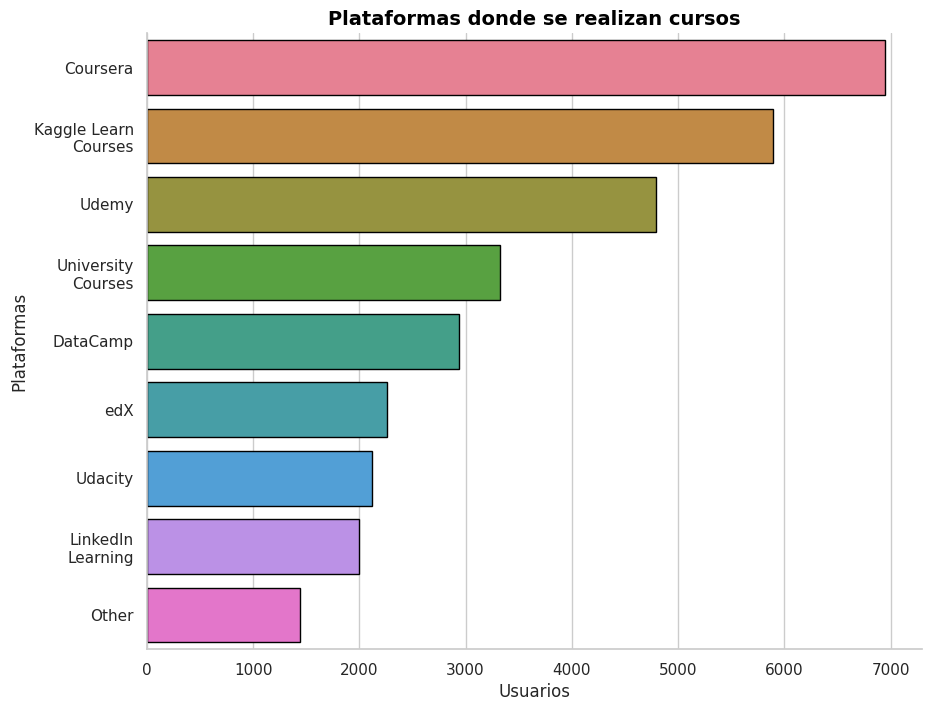

In [448]:
fig = sns.countplot(y = 'q40_plat_cursos', data = df_cursos, order =lista_cursos_total,  edgecolor ='black')
fig.set(ylabel='Plataformas', xlabel = 'Usuarios')
wrap_labels(fig, 15)
plt.title(label = "Plataformas donde se realizan cursos", color = "black", fontsize = 14, fontweight='bold')
plt.show()

In [419]:
# Creamos una lista para los top 4 
lista_cursos = df_cursos['q40_plat_cursos'].value_counts()[:4].index.tolist()

['Coursera', 'Kaggle Learn Courses', 'Udemy', 'University Courses']

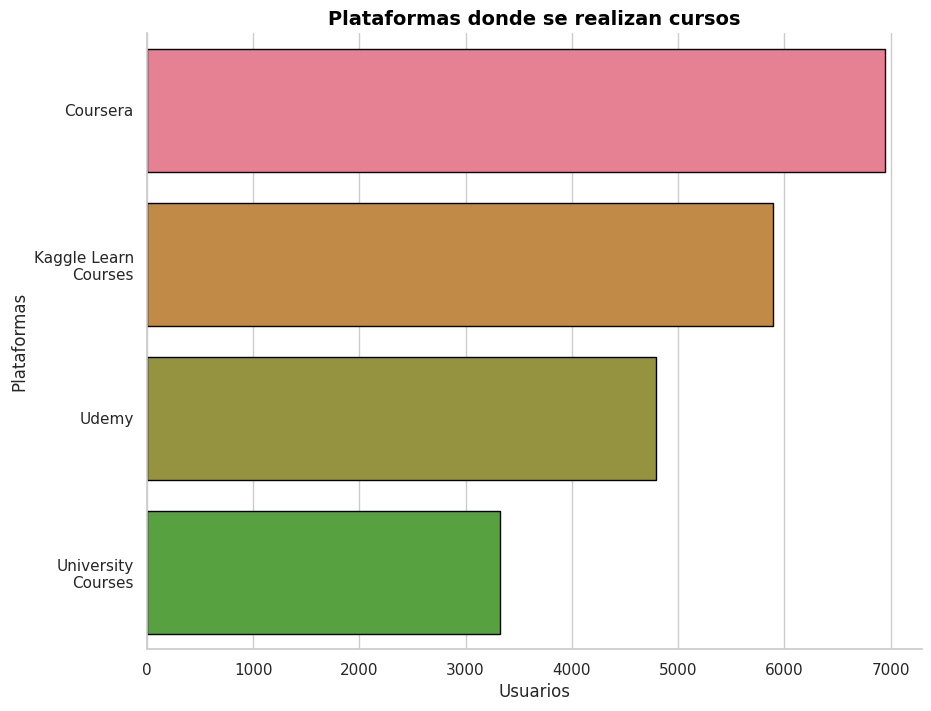

In [449]:
fig = sns.countplot(y ='q40_plat_cursos', data = df_cursos, order =lista_cursos,  edgecolor ='black')
fig.set(xlabel='Usuarios', ylabel = 'Plataformas')
wrap_labels(fig, 15)
plt.title(label = "Plataformas donde se realizan cursos", color = "black", fontsize = 14, fontweight='bold')
plt.show()

---

## PREGUNTAS B

---

---
### PRODUCTOS DE CLOUD COMPUTING
---

In [421]:
orden_q29b = df_q29b_noprof['q29b_productos_familiar_cloud_computing'].value_counts().index.tolist()

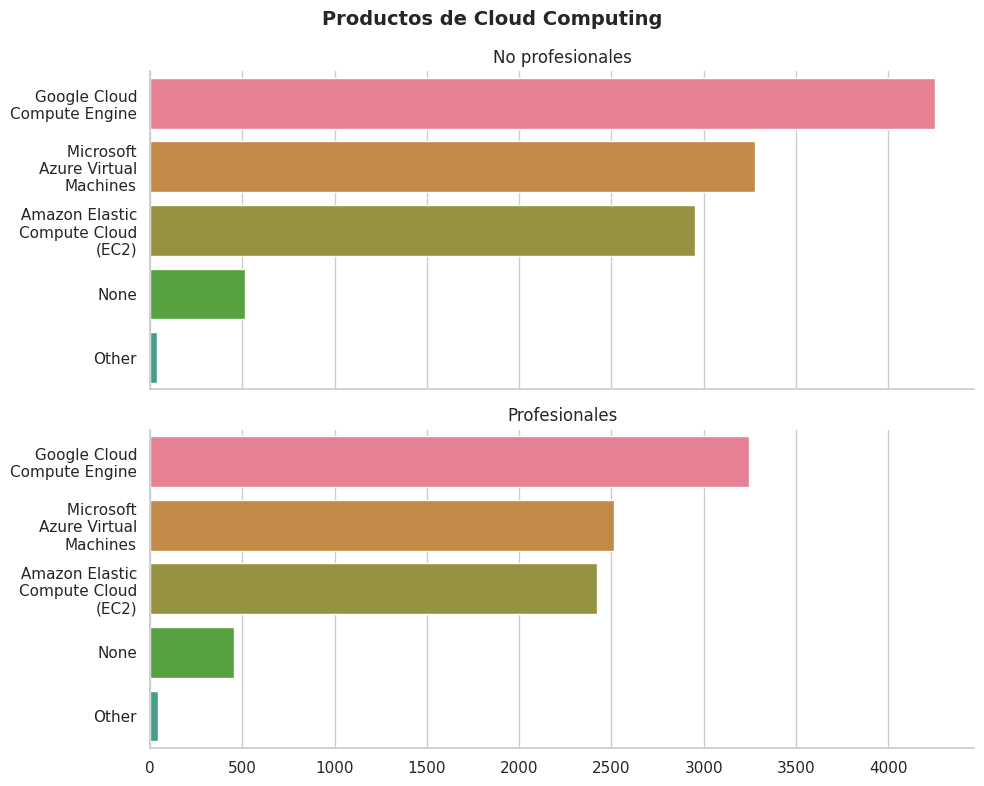

In [455]:
fig, axes = plt.subplots(2,1, sharex= True)

fig1= sns.countplot(data = df_q29b_noprof, y = 'q29b_productos_familiar_cloud_computing', ax = axes[0], order= orden_q29b)
fig2=sns.countplot(data = df_q29b_prof, y = 'q29b_productos_familiar_cloud_computing', ax = axes[1], order= orden_q29b)

fig.suptitle("Productos de Cloud Computing", fontsize = 14, fontweight='bold')
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
wrap_labels(fig1, 15)
wrap_labels(fig2, 15)

plt.tight_layout()
plt.show();

---
### PRODUCTOS BIG DATA
---

In [ ]:
orden_q32b = df_q32b_noprof['q32b_productos_familiar_bd'].value_counts()[:5].index.tolist()

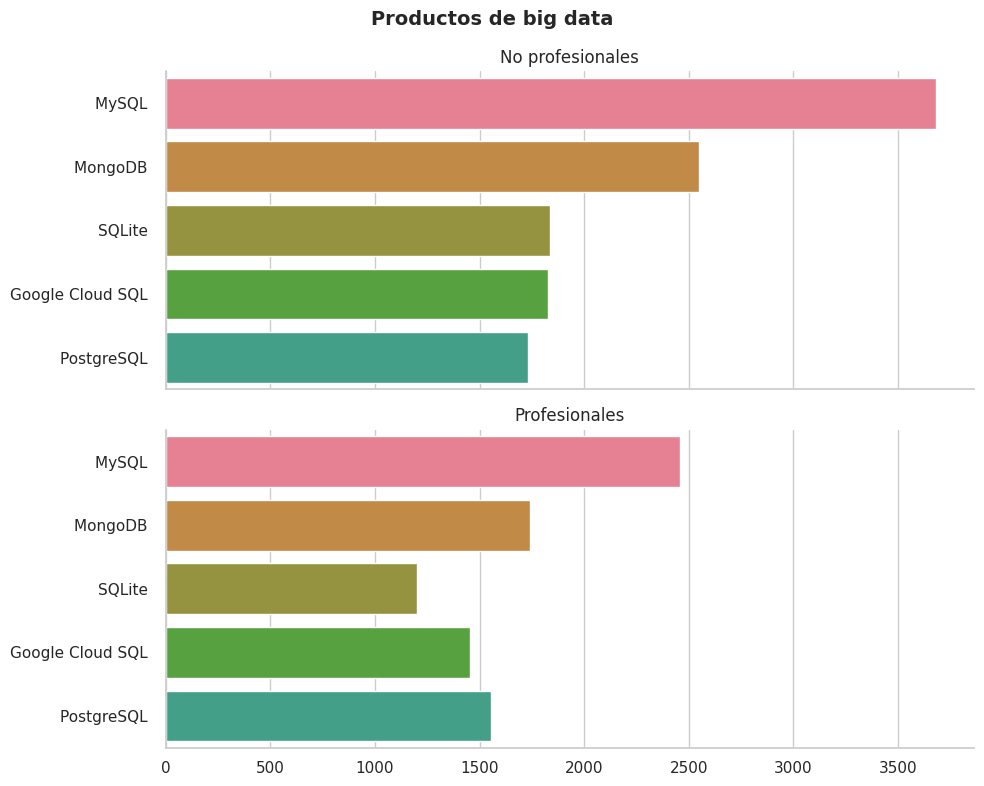

In [458]:
fig, axes = plt.subplots(2,1, sharex= True)

fig1 = sns.countplot(data = df_q32b_noprof, y = 'q32b_productos_familiar_bd', ax = axes[0], order= orden_q32b)
fig2 = sns.countplot(data = df_q32b_prof, y = 'q32b_productos_familiar_bd', ax = axes[1], order= orden_q32b)

fig.suptitle("Productos de big data", fontsize = 14, fontweight='bold')
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

plt.tight_layout()
plt.show();

---
### HERRAMIENTAS DE BUSINESS INTELLIGENCE
---

In [ ]:
orden_q34b = df_q34b_noprof['q34b_herramientas_familiar_bi'].value_counts()[:5].index.tolist()

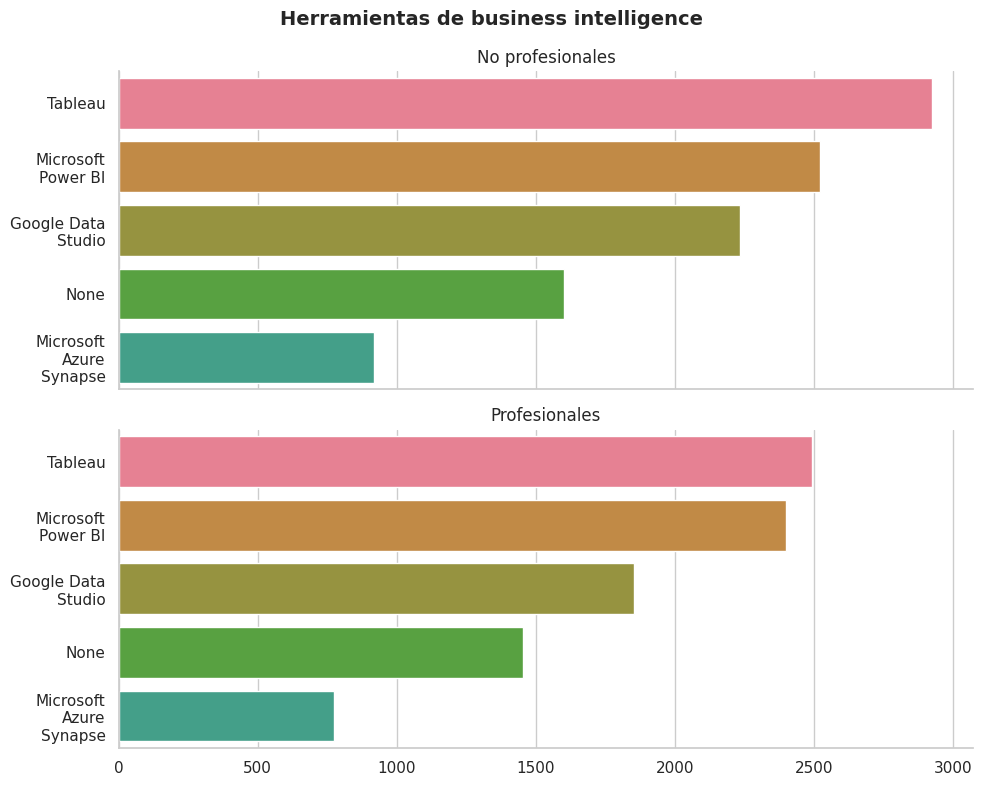

In [461]:
fig, axes = plt.subplots(2,1, sharex= True)

fig1 = sns.countplot(data = df_q34b_noprof, y = 'q34b_herramientas_familiar_bi', ax = axes[0], order= orden_q34b)
fig2 = sns.countplot(data = df_q34b_prof, y = 'q34b_herramientas_familiar_bi', ax = axes[1], order= orden_q34b)

fig.suptitle("Herramientas de business intelligence", fontsize = 14, fontweight='bold')
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
wrap_labels(fig1, 12)
wrap_labels(fig2, 12)

plt.tight_layout()
plt.show();

---
### HERRAMIENTAS DE MACHINE LEARNING AUTOMATIZADAS
---

In [ ]:
orden_q37b = df_q37b_noprof['q37b_cat_herramientas_familiar_ml_aut'].value_counts()[:5].index.tolist()

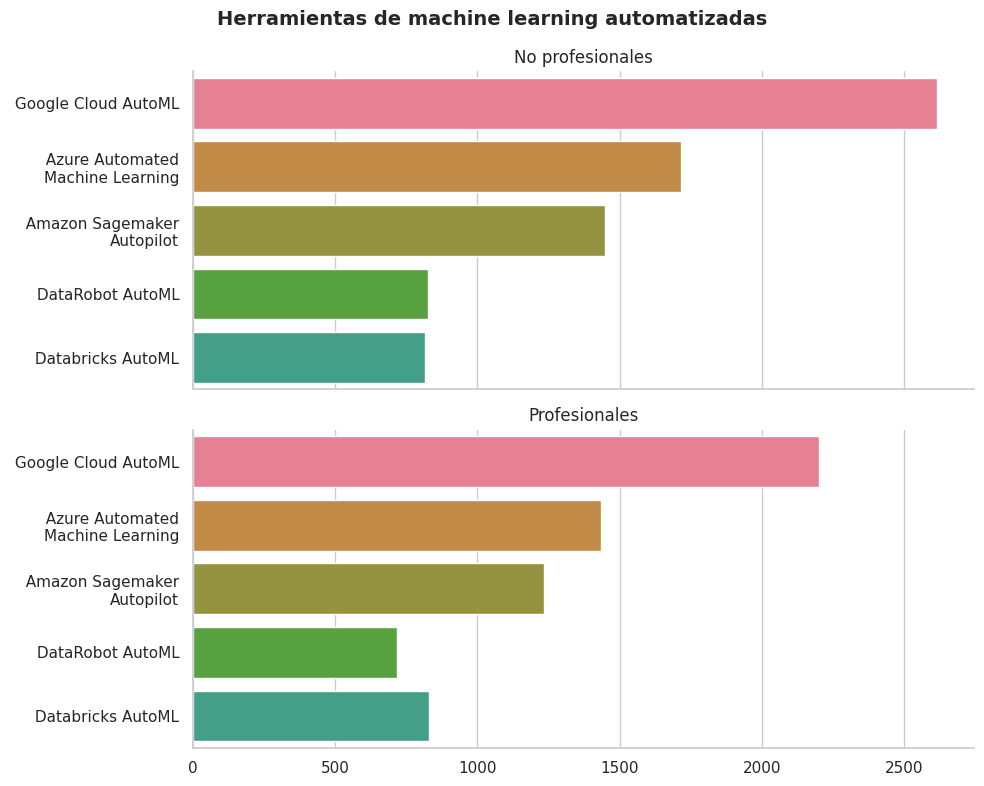

In [464]:
fig, axes = plt.subplots(2,1, sharex= True)

fig1 = sns.countplot(data = df_q37b_noprof, y = 'q37b_cat_herramientas_familiar_ml_aut', ax = axes[0], order= orden_q37b)
fig2 = sns.countplot(data = df_q37b_prof, y = 'q37b_cat_herramientas_familiar_ml_aut', ax = axes[1], order= orden_q37b)

fig.suptitle("Herramientas de machine learning automatizadas", fontsize = 14, fontweight='bold')
axes[0].set_title("No profesionales")
axes[1].set_title("Profesionales")

axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
wrap_labels(fig1, 20)
wrap_labels(fig2, 20)

plt.tight_layout()
plt.show();

---

### ANÁLISIS DE VARIABLES GENÉRICAS (PUESTOS DE TRABAJO, SALARIO, EDAD)

---


In [466]:
def limpiar(col):
    try:
        return col.replace("+","").split("-")[0]
    except:
        return col

In [467]:
#Creamos una nueva columna edad_num con la columna edad en tipo numérico
df["edad_num"] = df["edad"].apply(limpiar).astype("float64", errors= "raise")

In [468]:
def truncar(col):
    return math.trunc(col)

In [469]:
# Quitamos los decimales de la columna salario
df["salario"] = df['salario'].apply(truncar).astype("float64", errors= "raise")

In [470]:
#Filtramos df para quitar los datos de género = other
df_grafica =df[ df['genero'] != 'Otros']

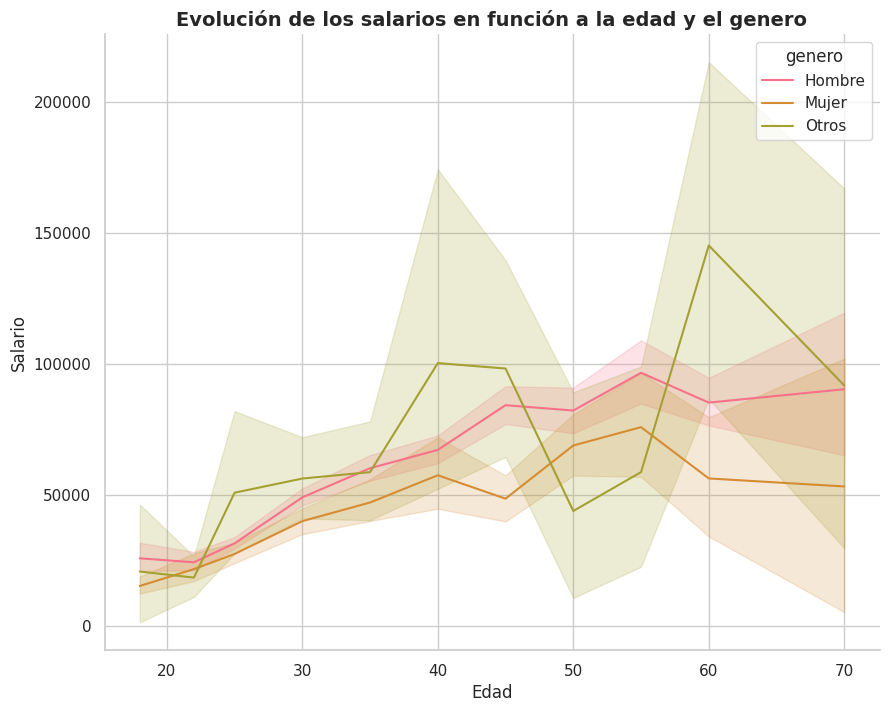

In [471]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df, hue = 'genero')

# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero',  fontsize = 14, fontweight='bold');

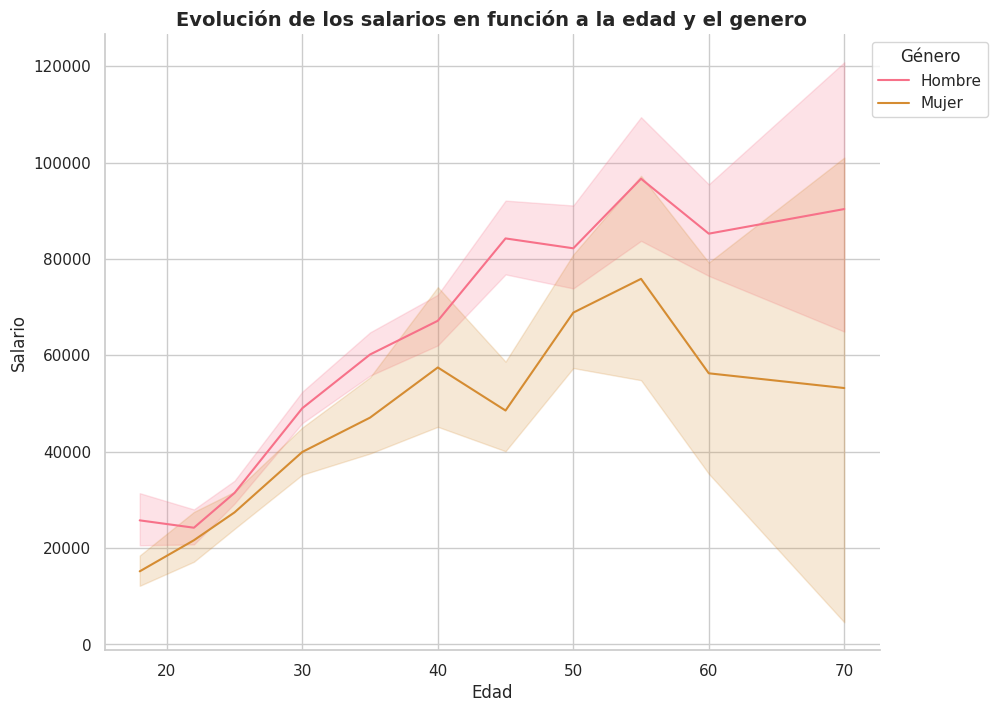

In [483]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df_grafica, hue = 'genero')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero', fontsize = 14, fontweight='bold')
plt.legend(title='Género', bbox_to_anchor=(1.15, 1));


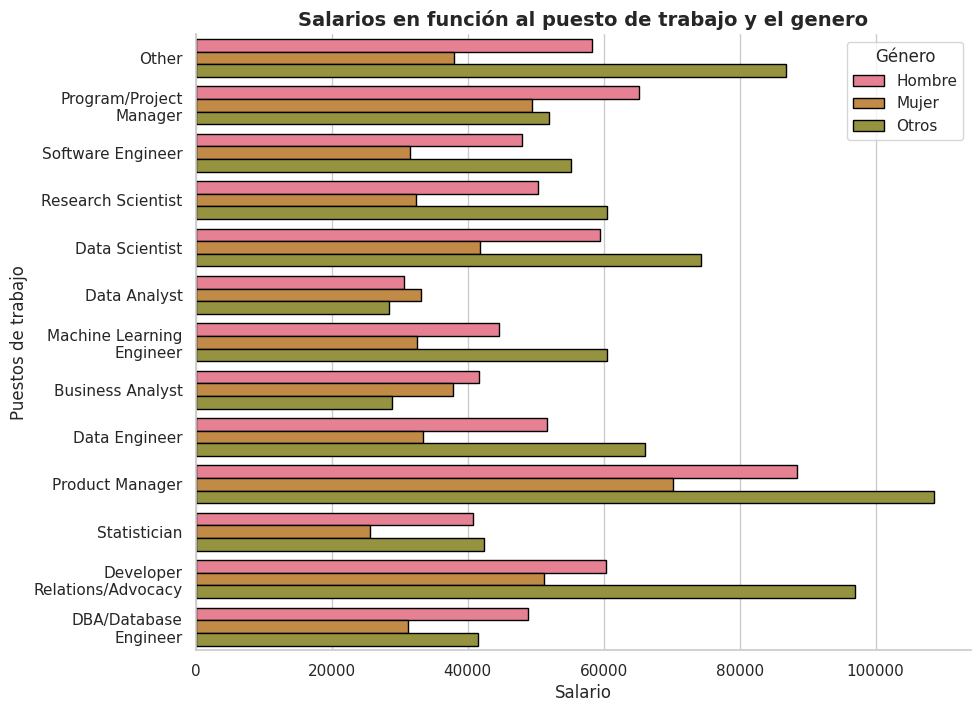

In [490]:
fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df, hue='genero', errorbar = ('ci', 0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Puestos de trabajo')
# ponemos título a la gráfica
fig.set_title('Salarios en función al puesto de trabajo y el genero', fontsize = 14, fontweight='bold')
wrap_labels(fig, 20)
plt.legend(title='Género', bbox_to_anchor=(1, 1));

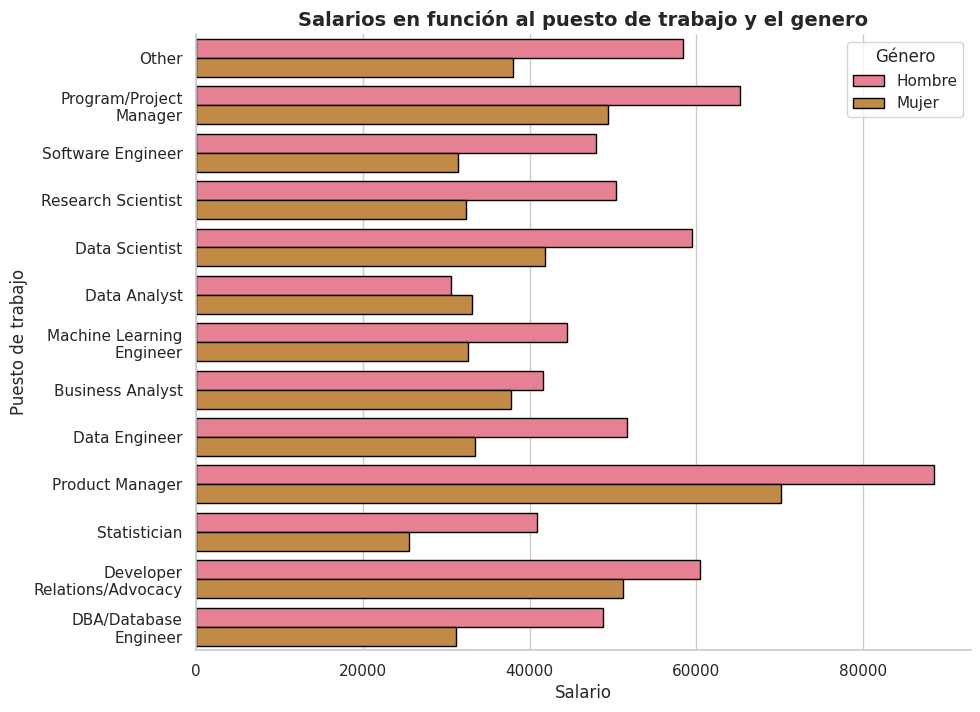

In [491]:
fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df_grafica, hue='genero', errorbar = ('ci', 0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Puesto de trabajo')
# ponemos título a la gráfica
fig.set_title('Salarios en función al puesto de trabajo y el genero', fontsize = 14, fontweight='bold')
wrap_labels(fig, 20)
plt.legend(title='Género', bbox_to_anchor=(1, 1));

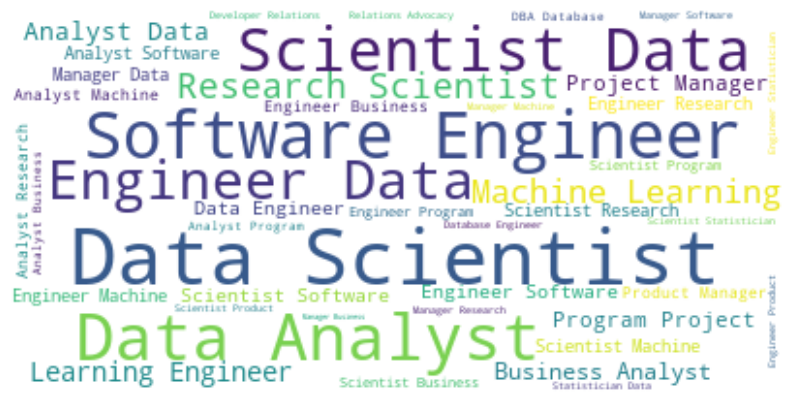

In [475]:
text = " ".join(review for review in df.puesto_trabajo.astype(str))
# Read the whole text.
text = text

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

plt.show()